In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler

import sklearn.metrics as metrics


import seaborn as sn
LABELS = [
    "WALKING",
    "WALKING_UPSTAIRS",
    "WALKING_DOWNSTAIRS",
    "SITTING",
    "STANDING",
    "LAYING"
]

In [3]:
d = {'Precision':[],'Recall':[],'F-score':[],'Accuracy':[] }
def results(clf, X, y_true): 
    clf.fit(X_train_fex.values, y_train.values.ravel())
    
    X_test_values = X.values
    y_predicted = clf.predict(X_test_values)
    print(classification_report(y_true, y_predicted))

    array = confusion_matrix(y_true, y_predicted)
    df_cm = pd.DataFrame(array, index = [i for i in LABELS],
                    columns = [i for i in LABELS])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True, cmap="BuPu",fmt='g')
    
   
    recall = metrics.recall_score(y_true, y_predicted, average='macro' )
    precision = metrics.precision_score(y_true, y_predicted, average='macro' )
    f_score = metrics.f1_score(y_true, y_predicted, average="macro") 
    acc = metrics.accuracy_score(y_true, y_predicted)
    
    print(round(recall,4) * 100, 'Recall')
    print(round(precision, 4)*100, 'pre')
    print(round(f_score, 4)*100, "fscore")
    print(round(acc, 4) *100, 'acc')
    
    
    
    d['Precision'].append(round(precision, 4)*100)
    d['Recall'].append(round(recall,4) * 100)
    d['F-score'].append(round(f_score, 4)*100)
    d['Accuracy'].append(round(acc, 4) *100)
                


In [4]:



# #The data with extracted features
# X_train_fex = pd.read_csv("UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
# X_test_fex = pd.read_csv("UCI HAR Dataset/test/X_test.txt",delim_whitespace=True, header=None)




# y_train = pd.read_csv("UCI HAR Dataset/train/y_train.txt", delim_whitespace=True, header=None)
# y_test = pd.read_csv("UCI HAR Dataset/test/y_test.txt", delim_whitespace=True, header=None)

In [50]:
scaler = MinMaxScaler(feature_range = [-1,1])

X_train_fex = pd.read_csv("TRAIN_NEW_ALL.csv")
X_test_fex = pd.read_csv("TEST_NEW_ALL.csv")


X_train_fex = scaler.fit_transform(X_train_fex)
X_test_fex  = scaler.fit_transform(X_test_fex)

X_train_fex = pd.DataFrame(X_train_fex)
X_test_fex = pd.DataFrame(X_test_fex)

print(X_train_fex.shape, X_test_fex.shape)



y_train = pd.read_csv("UCI HAR Dataset/train/y_train.txt", delim_whitespace=True, header=None)[:-1]
y_test = pd.read_csv("UCI HAR Dataset/test/y_test.txt", delim_whitespace=True, header=None)[:-1]

print(y_train.shape, y_test.shape)

(7351, 561) (2946, 561)
(7351, 1) (2946, 1)


In [51]:
X_train_fex.describe()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
count,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,...,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000
mean,-0.041764,0.024651,0.010698,-0.693395,-0.673158,-0.634587,-0.744563,-0.718746,-0.738726,-0.750173,...,0.588460,0.528897,0.462929,0.003689,-0.007708,-0.490565,0.127552,-0.487831,0.444620,-0.063355
std,0.137896,0.112260,0.130442,0.336992,0.380106,0.408590,0.294540,0.332310,0.310031,0.280563,...,0.316412,0.281200,0.313303,0.460094,0.477701,0.861121,0.461045,0.511717,0.406266,0.281879
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.058049,0.014604,-0.003415,-0.988255,-0.986078,-0.988623,-0.991653,-0.989882,-0.992896,-0.989537,...,0.401653,0.396947,0.301442,-0.337894,-0.371466,-1.000000,-0.149677,-0.811596,0.338585,-0.151012
50%,-0.041374,0.027357,0.010888,-0.907514,-0.923556,-0.917709,-0.946229,-0.950742,-0.958117,-0.915971,...,0.651743,0.578332,0.519449,0.008741,-0.001520,-1.000000,0.131098,-0.707314,0.612371,-0.002939
75%,-0.027101,0.037801,0.023791,-0.415361,-0.420114,-0.278851,-0.515707,-0.487298,-0.488095,-0.540270,...,0.842485,0.732574,0.698221,0.354313,0.359161,0.414214,0.477220,-0.501801,0.702589,0.102574
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
X_train_fex.iloc[1,:].max()

0.9999988813719067

In [53]:
y_train.columns

Int64Index([0], dtype='int64')

In [54]:
y_train[0].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1072
3     986
Name: 0, dtype: int64

In [55]:
y_tr = y_train.copy()
y_tt = y_test.copy()

In [56]:
y_train

,0
0,5
1,5
2,5
3,5
4,5
...,...
7346,2
7347,2
7348,2
7349,2


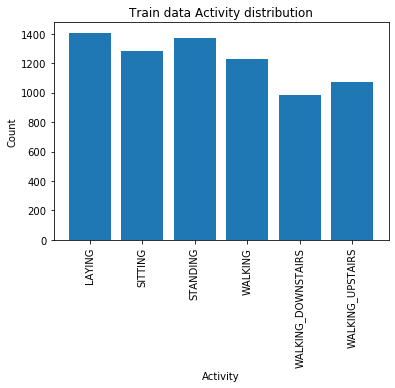

In [57]:
y_tr['Label'] = y_tr[0].apply(lambda x: LABELS[x-1] )

plt.bar(x = y_tr.groupby('Label').count().index, height = y_tr.groupby('Label').count()[0].values)

plt.title('Train data Activity distribution')
plt.ylabel("Count")
plt.xlabel('Activity')
plt.xticks(rotation = 90)
plt.show()

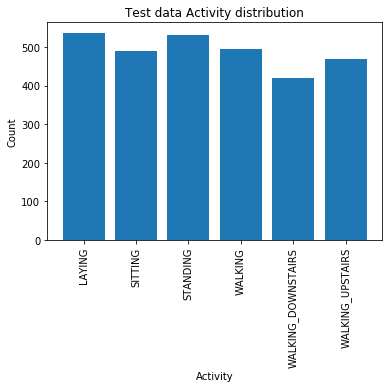

In [60]:
y_tt['Label'] = y_tt[0].apply(lambda x: LABELS[x-1] )

plt.bar(x = y_tt.groupby('Label').count().index, height = y_tt.groupby('Label').count()[0].values)

plt.title('Test data Activity distribution')
plt.ylabel("Count")
plt.xlabel('Activity')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
y_test[0].value_counts()

In [ ]:
X_train_fex

In [6]:
pca = PCA().fit(X_train_fex)
n_pcs= pca.components_.shape[0]
print(n_pcs)
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
most_important = most_important[:300]
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('HAR FEATURE Explained Variance')
plt.show()
#components_

NameError: name 'X_train_fex' is not defined

In [7]:
clf = SVC(gamma='auto')
results(clf, X_test_fex, y_test)

NameError: name 'X_test_fex' is not defined

In [8]:
d

{'Precision': [], 'Recall': [], 'F-score': [], 'Accuracy': []}

In [9]:
clf = KNeighborsClassifier()
results(clf, X_test_fex, y_test)

NameError: name 'X_test_fex' is not defined

In [10]:
clf = RandomForestClassifier()
results(clf, X_test_fex, y_test)

NameError: name 'X_test_fex' is not defined

In [22]:
l = ['Support Vector Machine',
    'K-Nearest Neighbors',
    'Random Forest'
    ]
d
q = pd.DataFrame(d, index = l)
q

ValueError: Shape of passed values is (4, 4), indices imply (3, 4)

# GridSearch

In [23]:
from sklearn.model_selection import GridSearchCV

In [25]:
from sklearn.model_selection import GridSearchCV
def svc_param_selection(X, y, nfolds):

    param_grid = {'C': [0.01, 0.1, 1, 10, 100], 
                  'gamma' : [0.01, 0.1, 1], 
                  'kernel': ['linear', 'poly', 'rbf', 'sigmoid'] }

#     param_grid = {'C': [100, 1000,10000, 100000], 
#                 'gamma' : [0.0001, 0.001, 0.01], 
#                 'kernel': ['rbf'] }

    grid_search = GridSearchCV( SVC(), 
                             param_grid, 
                             cv = nfolds,
                             n_jobs = -1) # use all processor
    grid_search.fit(X, y)

    return grid_search.best_params_

svc_param_selection(X_train_fex.values, y_train, 5)

/Users/serik/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [16]:
d = {"Precision":[], 'Recall':[],'F-score': [], 'Accuracy': []} 

              precision    recall  f1-score   support

           1       0.90      0.87      0.89       496
           2       0.99      0.81      0.89       470
           3       0.79      0.99      0.88       420
           4       0.67      0.99      0.80       491
           5       0.99      0.55      0.71       532
           6       1.00      1.00      1.00       537

    accuracy                           0.86      2946
   macro avg       0.89      0.87      0.86      2946
weighted avg       0.90      0.86      0.86      2946

86.96000000000001 Recall
89.18 pre
86.2 fscore
86.49 acc


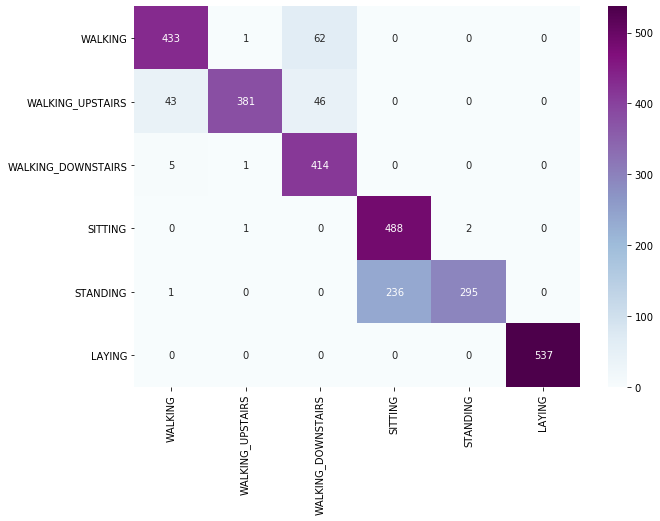

In [28]:
clf = SVC(C = 10, gamma = 0.01, kernel= 'rbf')
results(clf, X_test_fex, y_test)

In [40]:
def knn_param_selection(X, y, nfolds):
    # param_grid = {'n_neighbors' : [3,5,7,11], 
    param_grid = {'n_neighbors' : [11,13,15,19,21]}
                # 'weights':['uniform', 'distance'], 
                # 'metric':['euclidean','manhattan'] }

    grid_search = GridSearchCV(KNeighborsClassifier(), 
                             param_grid, 
                             cv = nfolds,
                             n_jobs = -1)

    grid_search.fit(X,y)

    return grid_search.best_params_
                  
# knn_param_selection(X_train_fex.values, y_train, 5)

/Users/serik/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_neighbors': 15}

In [18]:
clf = KNeighborsClassifier(metric= 'manhattan', n_neighbors = 15, weights = 'distance')
results(clf, X_test_fex, y_test)

              precision    recall  f1-score   support

           1       0.86      0.98      0.92       496
           2       0.88      0.91      0.89       471
           3       0.98      0.78      0.87       420
           4       0.97      0.82      0.89       491
           5       0.86      0.98      0.91       532
           6       1.00      1.00      1.00       537

    accuracy                           0.92      2947
   macro avg       0.92      0.91      0.91      2947
weighted avg       0.92      0.92      0.92      2947

91.23 Recall
92.45 pre
91.43 fscore
91.79 acc


In [7]:
def rf_param_selection(X, y, nfolds):
    param_grid = {'n_estimators': [40, 50, 150],
                'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
                'min_samples_split': [4, 6,8, 10]}

    grid_search = GridSearchCV(RandomForestClassifier(),
                             param_grid,
                             cv = nfolds,
                             n_jobs = -1)
    grid_search.fit(X,y)

    return grid_search.best_params_

rf_param_selection(X_train_fex.values, y_train, 5)

/Users/serik/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_features': 'sqrt', 'min_samples_split': 6, 'n_estimators': 150}

              precision    recall  f1-score   support

           1       0.91      0.76      0.83       496
           2       0.97      0.69      0.81       470
           3       0.64      0.97      0.77       420
           4       0.79      0.95      0.86       491
           5       0.94      0.77      0.85       532
           6       1.00      1.00      1.00       537

    accuracy                           0.86      2946
   macro avg       0.87      0.86      0.85      2946
weighted avg       0.88      0.86      0.86      2946

85.57000000000001 Recall
87.42 pre
85.19 fscore
85.50999999999999 acc


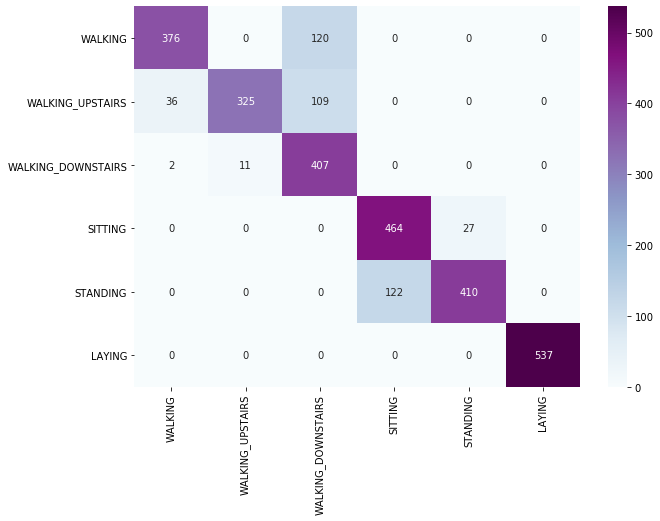

In [29]:
clf = RandomForestClassifier(max_features= 'sqrt', min_samples_split= 6, n_estimators = 50)
results(clf, X_test_fex, y_test)

In [20]:
l = ['Support Vector Machine',
    'K-Nearest Neighbors',
    'Random Forest'
    ]
d
q = pd.DataFrame(d, index = l)
q

,Precision,Recall,F-score,Accuracy
Support Vector Machine,96.63,96.33,96.42,96.47
K-Nearest Neighbors,92.45,91.23,91.43,91.79
Random Forest,92.62,92.24,92.35,92.53


# TEST

In [48]:
pd.options.display.max_columns = 9999
pd.options.display.float_format = '{:,.5f}'.format

In [46]:
clf = SVC(C = 10000, gamma = 0.01, kernel= 'rbf')
clf.fit(X_train_fex.values, y_train.values.ravel())


SVC(C=10000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
rf = RandomForestClassifier(max_features= 'sqrt', min_samples_split= 6, n_estimators = 50)
rf.fit(X_train_fex.values, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
LABELS = [
    "WALKING",
    "WALKING_UPSTAIRS",
    "WALKING_DOWNSTAIRS",
    "SITTING",
    "STANDING",
    "LAYING"
]

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
X_train_fex = pd.read_csv("TRAIN_NEW_ALL.csv")
X_train_fex

y_train = pd.read_csv("UCI HAR Dataset/train/y_train.txt", delim_whitespace=True, header=None)[:-1]

X_test_fex = pd.read_csv("TEST_NEW_ALL.csv")
X_test_fex

Y = pd.read_csv("UCI HAR Dataset/test/y_test.txt", delim_whitespace=True, header=None)[:-1]


scaler = MinMaxScaler(feature_range = [-1,1])
X_train_fex  = scaler.fit_transform(X_train_fex)
X_train_fex = pd.DataFrame(X_train_fex)

In [15]:
X_test_fex = pd.read_csv("TEST_NEW_ALL.csv")
X_test_fex

Y = pd.read_csv("UCI HAR Dataset/test/y_test.txt", delim_whitespace=True, header=None)[:-1]

In [16]:
scaler = MinMaxScaler(feature_range = [-1,1])

X_test_fex  = scaler.fit_transform(X_test_fex)

X_test_fex = pd.DataFrame(X_test_fex)

In [17]:
clf = SVC(C = 10000, gamma = 0.01, kernel= 'rbf')
clf.fit(X_train_fex.values, y_train.values.ravel())

SVC(C=10000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
y_predicted = clf.predict(X_test_fex)
print(set(y_predicted))

{1, 2, 3, 4, 5, 6}


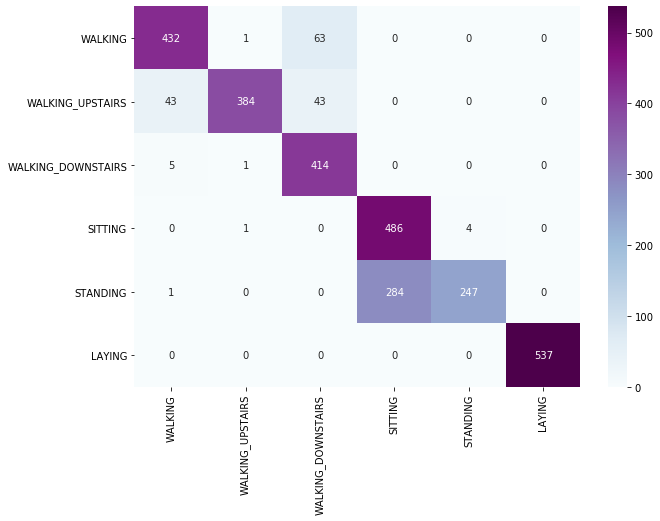

In [19]:
array = confusion_matrix(np.squeeze(Y.values),y_predicted)
df_cm = pd.DataFrame(array, index = [i for i in LABELS],
                columns = [i for i in LABELS])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap="BuPu",fmt='g')

In [20]:
metrics.accuracy_score(np.squeeze(Y.values),y_predicted)

0.8486082824168364

In [33]:
def check(model, X, Y):
    model.fit(X_train_fex.values, y_train.values.ravel())
    
    test_x = pd.read_csv('Real-time_v1/'+ X)
    test_y = pd.read_csv('Real-time_v1/'+ Y)
    
    print(test_x.shape)

    scaler = MinMaxScaler(feature_range = [-1,1])
    test_x  = scaler.fit_transform(test_x)
    
    y_predicted = model.predict(test_x)

    print(set(y_predicted))
    
    

   
    recall = metrics.recall_score(test_y,y_predicted, average='macro' )
    precision = metrics.precision_score(test_y,y_predicted, average='macro' )
    f_score = metrics.f1_score(test_y,y_predicted, average="macro") 
   
    
    print(round(recall,4) * 100, 'Recall')
    print(round(precision, 4)*100, 'pre')
    print(round(f_score, 4)*100, "fscore")
    print('Accuracy is: ', metrics.accuracy_score(test_y,y_predicted))
    
    array = confusion_matrix(test_y,y_predicted)
    df_cm = pd.DataFrame(array, index = [i for i in LABELS],
                    columns = [i for i in LABELS])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True, cmap="BuPu",fmt='g')



# SVM

(264, 561)
{1, 2, 3, 5, 6}
57.78 Recall
47.86 pre
50.22 fscore
Accuracy is:  0.571969696969697


/Users/serik/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


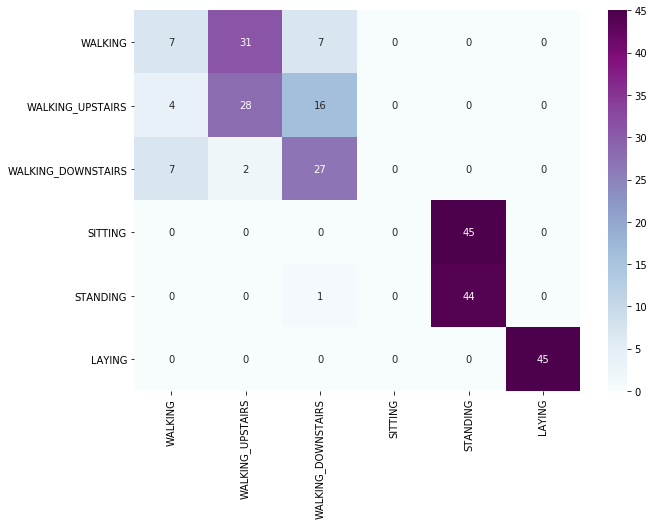

In [92]:
clf = SVC(C = 10000, gamma = 0.01, kernel= 'rbf')
clf.fit(X_train_fex.values, y_train.values.ravel())

check(clf, 'X.csv', 'Y.csv')

# KNN

{1, 2, 3, 4, 5, 6}
59.419999999999995 Recall
59.39 pre
54.59 fscore
Accuracy is:  0.5833333333333334


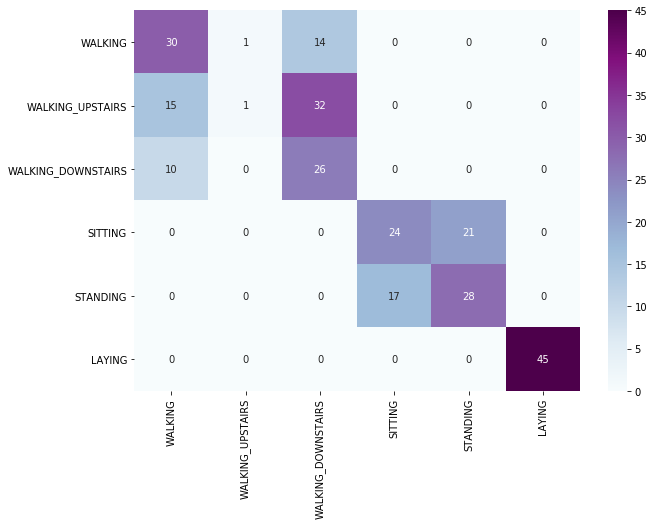

In [31]:
knn = KNeighborsClassifier(metric= 'manhattan', n_neighbors = 15, weights = 'distance')

knn.fit(X_train_fex.values, y_train.values.ravel())

check(knn, 'X.csv', 'Y.csv')

# Random Forest

(264, 561)
{1, 2, 3, 4, 5, 6}
68.54 Recall
74.95 pre
65.24 fscore
Accuracy is:  0.6704545454545454


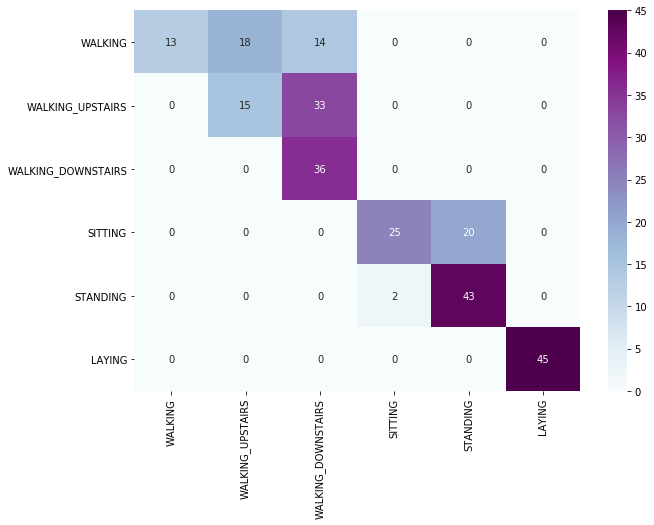

In [34]:
rf = RandomForestClassifier(max_features= 'sqrt', min_samples_split= 6, n_estimators = 50)

rf.fit(X_train_fex.values, y_train.values.ravel())

check(rf, 'X.csv', 'Y.csv')

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [33]:
test_y = pd.read_csv('Real-time_v1/'+ 'Y.csv', names = [0], header = None)[1:]
test_x = pd.read_csv('Real-time_v1/'+ 'X.csv', names = [0], header = None)[1:]

In [34]:
test_y[0].value_counts()

2    48
5    45
4    45
1    45
6    45
3    36
Name: 0, dtype: int64

In [44]:
y_tt = test_y

In [45]:
X_train_real

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,0
0.0011239644994011002,0.0009721091613485887,-0.00047744971298623056,0.002086610608187265,0.005576717984167965,0.002355095121214033,0.0018096130781417798,0.006114991501669569,0.0014290896937537926,0.007315140771202879,0.01367323272253762,0.006783899175514486,-0.004282767043589389,-0.015924120253063192,-0.008221758545402892,0.3367608219853883,0.0007190067233425398,0.004101731801154595,0.0007391272010747873,0.0028740192579245973,0.008006644687077475,0.001959473402895516,4.503298630587853,4.543331416053909,4.389052181241182,-1.353953278661425,0.9650821914094501,-0.5236343456909579,0.13630519178864003,-1.5863292394302708,1.4618266670848403,-0.772751245869675,0.310702843973534,-1.3925607089846437,1.0567642359857587,-0.6753069342635621,0.31747445247260314,-0.08674966013394952,-0.09897212187506416,-0.09153423483334124,0.1798676819561959,0.16097418118725634,-9.773962239612677,0.026054623436097893,0.012858381599541268,0.016939569182835953,0.026204614063723028,0.010686157716539755,0.012948211605800453,0.24849479589433748,0.19337767389341665,-9.731649320161514,0.1076250951654606,0.11265248546369631,-9.81335099466461,431.5649750509281,4.227996981080588,3.337987198242183,12227.919975728457,0.038020201134117165,0.01390015960720109,0.017271616975822468,4.841568285148661,4.848788715624215,4.852028761818897,-1.3822780055469026,1.0431531877784976,-0.6302869180093394,-0.027638646867782432,-1.4087781280940896,0.8931899074332809,-0.5426066202769171,0.059906626167114715,-1.4802221767902077,1.1379794374701226,-0.7929904539535286,0.13523383294846178,0.2593527212070222,-0.09372944377040299,0.02171612001948258,-0.000621731774649159,-0.00020783113943863632,0.000723081130146563,0.07626575775623387,0.2063354347165997,0.07886691210638688,0.058260483889769836,0.15703025186877623,0.03898834434195543,0.29616419684316986,0.5559368981669585,0.32179806708701253,-0.18313661772435666,-0.46183889296406516,-0.35111585696183345,10.950715626594912,0.7445571016361157,5.449517416124249,0.7962256219542179,0.07535480009907647,0.2041899218678534,0.05094039763881773,4.450558813802951,4.418092406484506,4.300901456360309,-0.456036115726027,0.7146043540531088,-0.21786504160493642,0.44736910156703913,-0.8572148299953719,0.9931440857441486,-0.46669794651128826,0.5016312075172814,-0.6142223744195392,0.73644801533747,-0.40154320395387366,0.4605092214360968,-0.17017485949928768,-0.029444406090848276,0.0505408369533479,0.1798676819561959,0.16097418118725634,-9.773962239612677,0.026054623436097893,0.012858381599541268,0.016939569182835953,0.026204614063723028,0.010686157716539755,0.012948211605800453,0.24849479589433748,0.19337767389341665,-9.731649320161514,0.1076250951654606,0.11265248546369631,-9.81335099466461,431.5649750509281,4.227996981080588,3.337987198242183,12227.919975728457,0.038020201134117165,0.01390015960720109,0.017271616975822468,4.841568285148661,4.848788715624215,4.852028761818897,-1.3822780055469026,1.0431531877784976,-0.6302869180093394,-0.027638646867782432,-1.4087781280940896,0.8931899074332809,-0.5426066202769171,0.059906626167114715,-1.4802221767902077,1.1379794374701226,-0.7929904539535286,0.13523383294846178,0.2593527212070222,-0.09372944377040299,0.02171612001948258,0.037877899303475925,-0.0025858647153382958,0.005094296124311115,1.099546922973268,0.5537010520131568,0.7378357348404934,0.6398927146134898,0.31643116149182693,0.5540973682844803,3.3045910267489638,3.1573772768747004,2.288401638491333,-3.833746

In [43]:
X_train_real.shape, X_test_real.shape

((176, 1), (88, 1))

In [38]:
y_train_real.shape

(176, 1)

In [46]:
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(test_x, y_tt, test_size=0.33, random_state=42)

In [40]:
y_tt = y_test_real

/Users/serik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


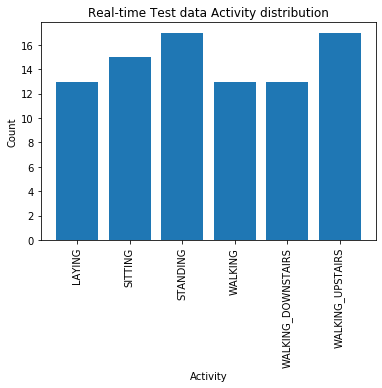

In [41]:
y_tt['Label'] = y_tt[0].apply(lambda x: LABELS[int(x)-1] )

plt.bar(x = y_tt.groupby('Label').count().index, height = y_tt.groupby('Label').count()[0].values)

plt.title('Real-time Test data Activity distribution')
plt.ylabel("Count")
plt.xlabel('Activity')
plt.xticks(rotation = 90)
plt.show()

1      WALKING
2      WALKING
3      WALKING
4      WALKING
5      WALKING
        ...   
260     LAYING
261     LAYING
262     LAYING
263     LAYING
264     LAYING
Name: 0, Length: 264, dtype: object